<a href="https://colab.research.google.com/github/dp2292/CP01-Data-Alchemists/blob/Krish/CP01_Data_Alchemists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Data Into the Collab**

## 1. Made Data directory
   Copied Zip file form GDrive

In [ ]:
!mkdir data

!gdown --id 1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ -O data/

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RfhNYBd7g70LdgJROvx8iPGygPhiGQLZ
To: /content/data/CP01.zip
100% 630M/630M [00:04<00:00, 128MB/s]



## 2. Unzipped CP01.zip file in data directory

In [ ]:
!unzip /content/data/CP01.zip -d /content/data

Archive:  /content/data/CP01.zip
  inflating: /content/data/For_modeling.csv  
  inflating: /content/data/cleaned_seoul_bike_data.csv  


# **Visualising the Data**

By visualizing the data in the CSV files, we can identify the properties of the data. This will help us determine which features/columns are useful for our model.

## 1. Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

## 2. Storing the data into variables and then visualising it

In [ ]:
dataframe = pd.read_csv("data/For_modeling.csv",index_col=0)
dataframe = dataframe.reset_index().drop(columns=['index'])
dataframe.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


## 3. Properties of the Data

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 25 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Duration    int64  
 1   Distance    int64  
 2   PLong       float64
 3   PLatd       float64
 4   DLong       float64
 5   DLatd       float64
 6   Haversine   float64
 7   Pmonth      int64  
 8   Pday        int64  
 9   Phour       int64  
 10  Pmin        int64  
 11  PDweek      int64  
 12  Dmonth      int64  
 13  Dday        int64  
 14  Dhour       int64  
 15  Dmin        int64  
 16  DDweek      int64  
 17  Temp        float64
 18  Precip      float64
 19  Wind        float64
 20  Humid       float64
 21  Solar       float64
 22  Snow        float64
 23  GroundTemp  float64
 24  Dust        float64
dtypes: float64(13), int64(12)
memory usage: 1.8 GB


## 4. Check whether there are any NaN or Null values in the data.
  And then sorting all the values in descending order.

In [ ]:
print(dataframe.isna().sum().sort_values(ascending=False))

Duration      0
Dday          0
GroundTemp    0
Snow          0
Solar         0
Humid         0
Wind          0
Precip        0
Temp          0
DDweek        0
Dmin          0
Dhour         0
Dmonth        0
Distance      0
PDweek        0
Pmin          0
Phour         0
Pday          0
Pmonth        0
Haversine     0
DLatd         0
DLong         0
PLatd         0
PLong         0
Dust          0
dtype: int64


## 5. Getting Statistical Analysis of the Data

In [ ]:
print("Shape of the Dataframe: " + str(dataframe.shape) + '\n\n')

dataframe.describe()

Shape of the Dataframe: (9601139, 25)




,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,3.713519e+03,3.754761e+01,1.269908e+02,3.754770e+01,1.269907e+02,1.870315e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856201e+01,1.784856e-02,1.819274e+00,5.397565e+01,7.300679e-01,9.948924e-03,2.072376e+01,3.245798e+01
std,2.504333e+01,3.956611e+03,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736282e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,1.230000e+03,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,2.280000e+03,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,4.620000e+03,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,3.329000e+04,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


# **Plotting Graphs**
By creating a graphical representation, we can visualize the data, which simplifies the process of identifying outliers, selecting relevant columns for our prediction model, and more.

## **Plotting the Graph for all Columns**
By plotting the graph we can visualise the data frequency for columns.

array([[<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'PLong'}>,
        <Axes: title={'center': 'PLatd'}>,
        <Axes: title={'center': 'DLong'}>],
       [<Axes: title={'center': 'DLatd'}>,
        <Axes: title={'center': 'Haversine'}>,
        <Axes: title={'center': 'Pmonth'}>,
        <Axes: title={'center': 'Pday'}>,
        <Axes: title={'center': 'Phour'}>],
       [<Axes: title={'center': 'Pmin'}>,
        <Axes: title={'center': 'PDweek'}>,
        <Axes: title={'center': 'Dmonth'}>,
        <Axes: title={'center': 'Dday'}>,
        <Axes: title={'center': 'Dhour'}>],
       [<Axes: title={'center': 'Dmin'}>,
        <Axes: title={'center': 'DDweek'}>,
        <Axes: title={'center': 'Temp'}>,
        <Axes: title={'center': 'Precip'}>,
        <Axes: title={'center': 'Wind'}>],
       [<Axes: title={'center': 'Humid'}>,
        <Axes: title={'center': 'Solar'}>,
        <Axes: title={'center': 'Snow'}>,

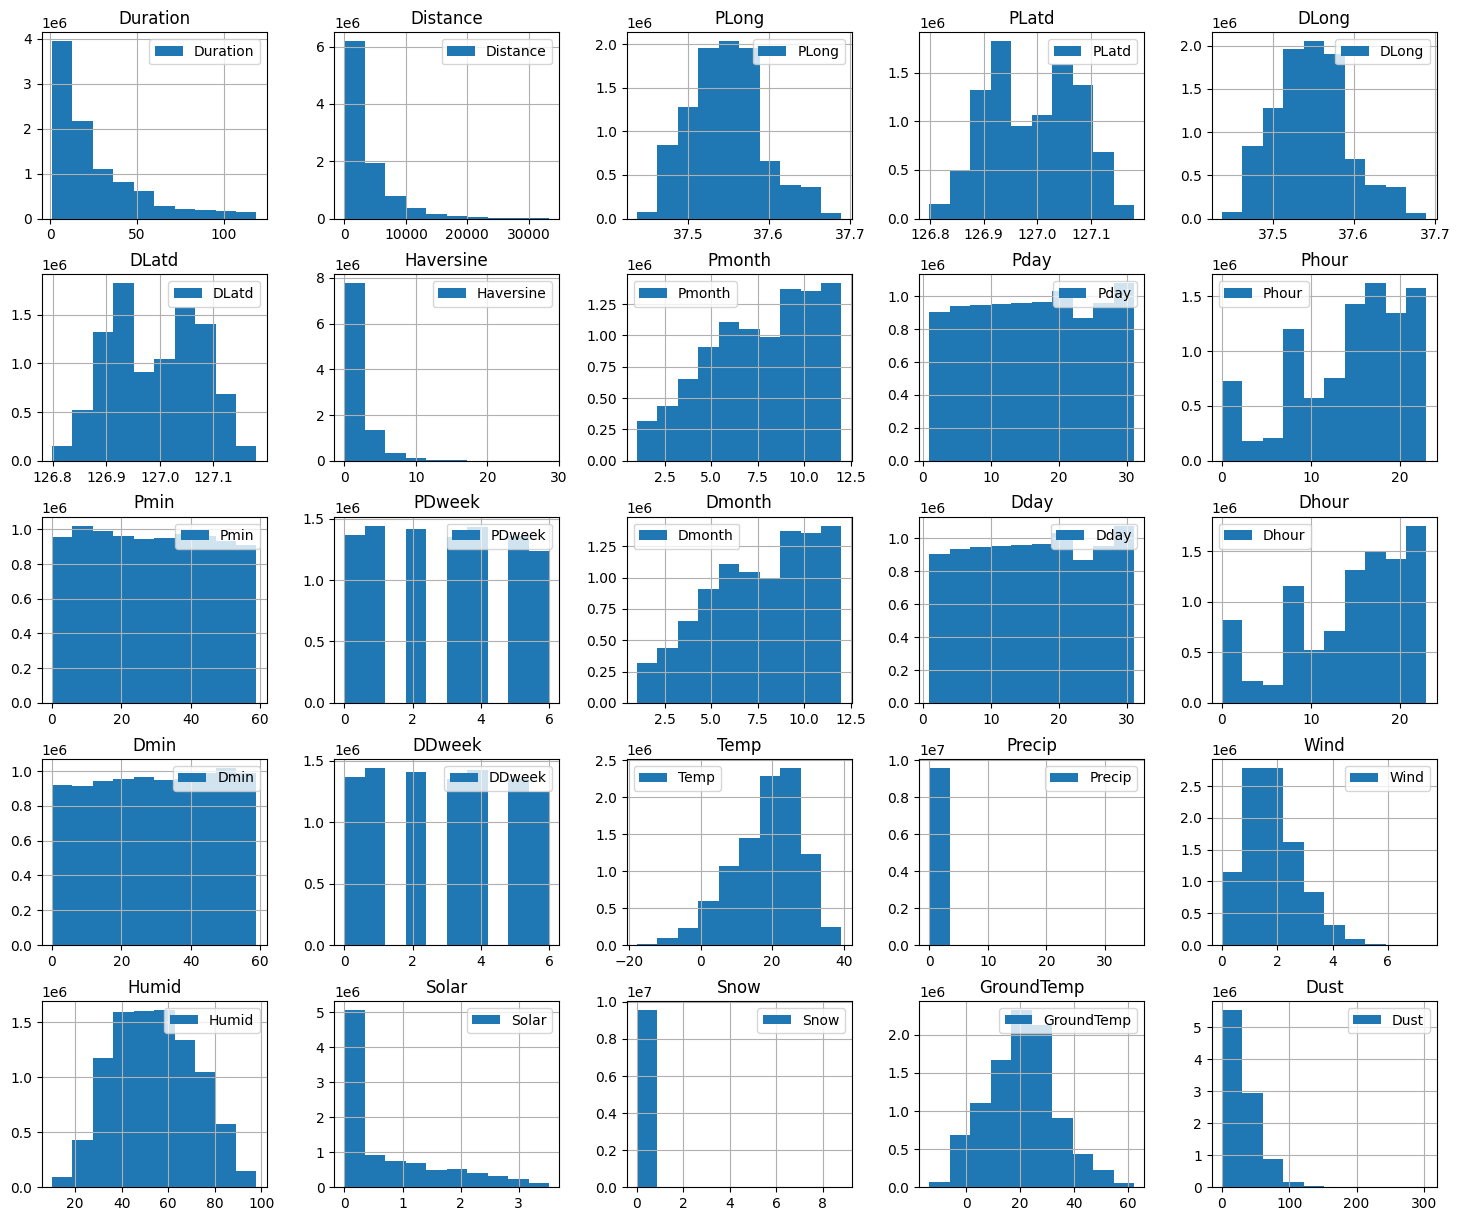

In [ ]:
# def make_graphs():
#   # Get the list of all column names
#   column_names = dataframe.columns

#   # Define the dimensions of the grid (5x5)
#   n_rows = 5
#   n_cols = 5

#   # Create a subplot grid
#   fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 17))

#   axes = axes.flatten()

#   # Loop through the columns and plot histograms
#   for i, col in enumerate(column_names):
#       if i >= n_rows * n_cols:
#           break
#       ax = axes[i]
#       dataframe[col].plot(kind='hist', ax=ax, bins=20)
#       ax.set_title(col)
#       ax.set_xlabel("Value")
#       ax.set_ylabel("Frequency")

#   for i in range(len(column_names), n_rows * n_cols):
#       fig.delaxes(axes[i])

#   plt.tight_layout()
#   plt.show()

# make_graphs()

dataframe.hist(figsize=(18, 15), legend=True)

**Analysis from the graphs of histogram:**

By above's graphs we can say that:

1.  Data distribution of **Duration**, **Distance**, **Haversine**, **Precipation**, **Wind**, **Solar Radiation**, **Snow** and **Dust** are skewed left.

2. Data distribution of **Temp** looks like its rightly skewed.

3. Data distribution of **Humid** looks like symmetric.

4.  Data distribution of columns given below are same:

  *   **Phour** and **Dhour**
  *   **Pday** and **Dday**
  *   **Pmonth** and **Dmonth**





## **Oulier Analysis**

### Box Plot of Duration, Distance, Haversine, Ground Temperatuare.

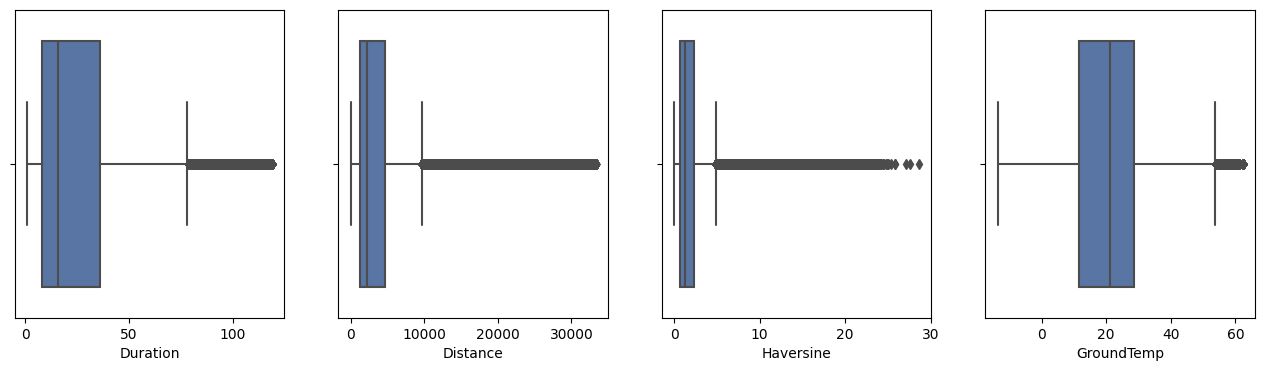

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Duration", "Distance", "Haversine","GroundTemp"]):
    sns.boxplot(x=dataframe[col], ax=ax[axid])

**Observation:**

1.   Mostly the duration of the trips are on the lower side of the spectrum, Which means that the trips with the small duration are the most common trips in the data.  
2.   Mostly the distance, haversine are on the left side of the spectrum, Which means that small distance are the most common trips in the data.



### Box Plot of Wind, Temperature, Pmin, Dmin

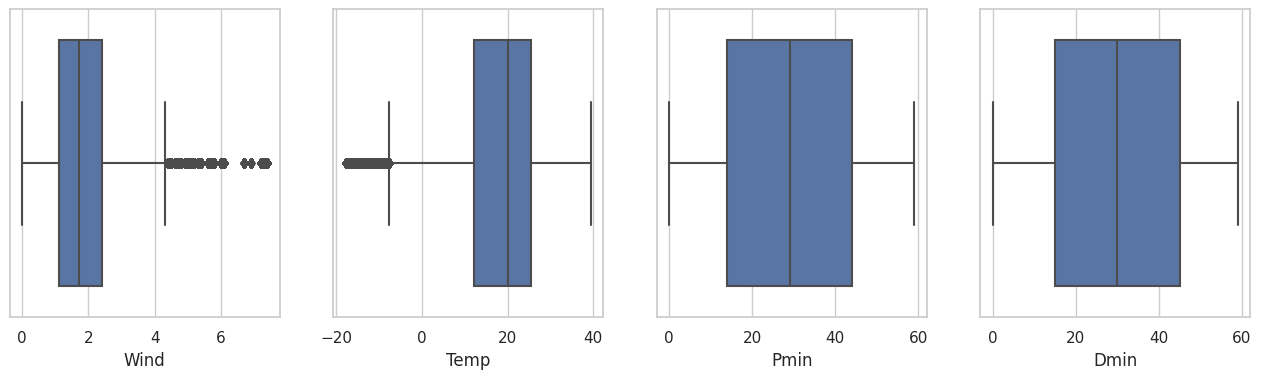

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Wind", "Temp", "Pmin", "Dmin"]):
    sns.boxplot(x=dataframe[col], ax=ax[axid])

**Observation:**


1.   Mostly the trips are planned when there is less windy weathor.
2.   More trips are planned when the whether is more sunn or temperature is bit higher.

3.   Mean values of Pmin and Dmin are nearly around 30 min.

### Box Plot of PDweek, DDweek, Phour, Dhour

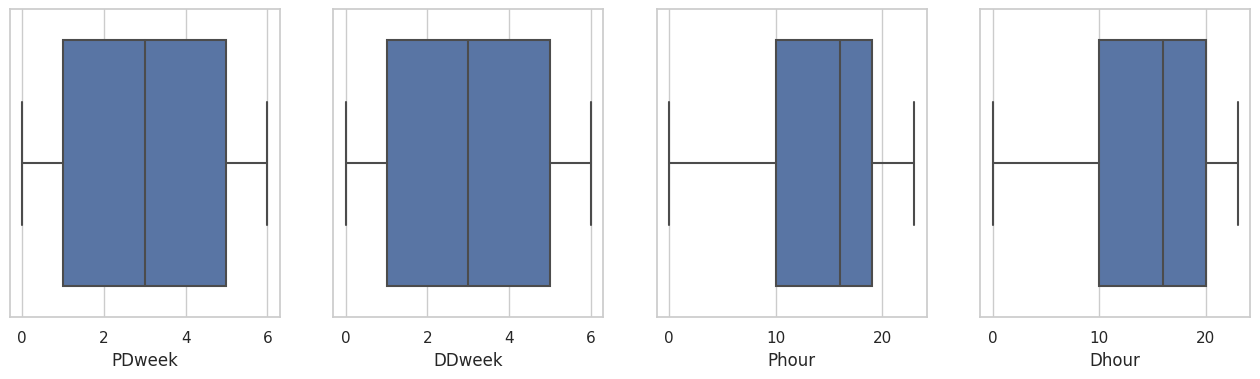

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["PDweek", "DDweek", "Phour", "Dhour"]):
    sns.boxplot(x=dataframe[col], ax=ax[axid])

**Observation:**
1.   PDweek and DDweek shows that there are equal number of pickup and drops throughout the week, respectively.

2.   Phour, Dhour shows that there are more number of pickup and drop towards the end of the day.

### Box Plot of PLong, PLatd, DLong, DLatd

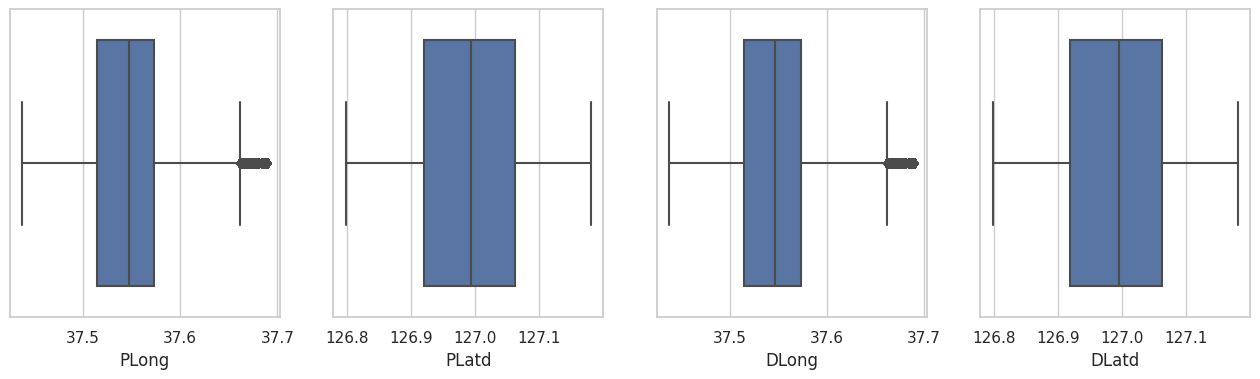

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["PLong", "PLatd", "DLong", "DLatd"]):
    sns.boxplot(x=dataframe[col], ax=ax[axid])

**Observation:**

Means of the Plong, Platd, Dlong, Dlatd

```
PLong : 37.559
PLatd : 126.99
DLong : 37.545
DLatd : 126.995
```

### Box Plot of Precip, Snow, PMonth, DMonth

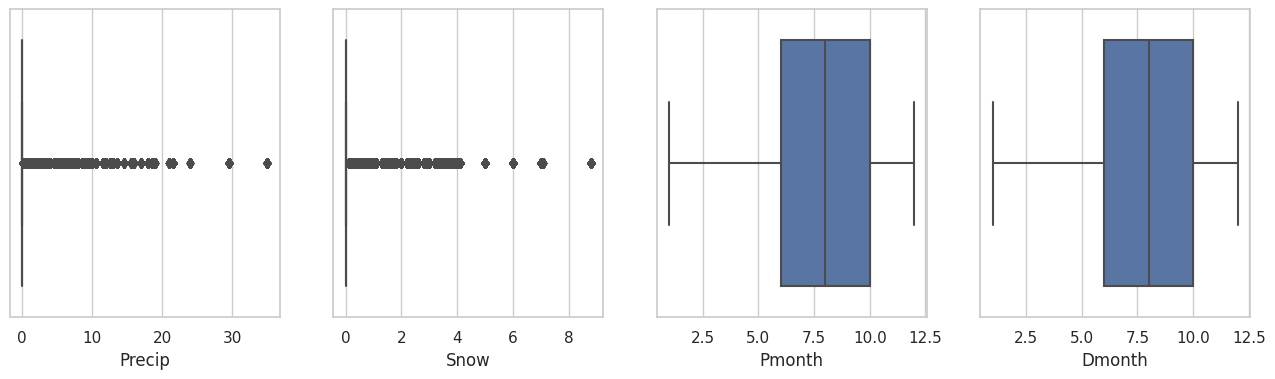

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Precip", "Snow", "Pmonth", "Dmonth"]):
    sns.boxplot(x=dataframe[col], ax=ax[axid])

**Observation:**

1.   By observation of Precepation and Snow's box plots we can say that more number of trips are planned when there is less snow/rain or no rain/snow at all.
2.   By observing Pmonth and Dmonth we can say that more number of pickup and drop are being done at the end time of the year.

# Finding Correlation and Plotting graphs related to Correlation

## Find Correlation between all column attributes
  by using seaborn module/library we can make heatmap graph to observe correlation between two different columns.

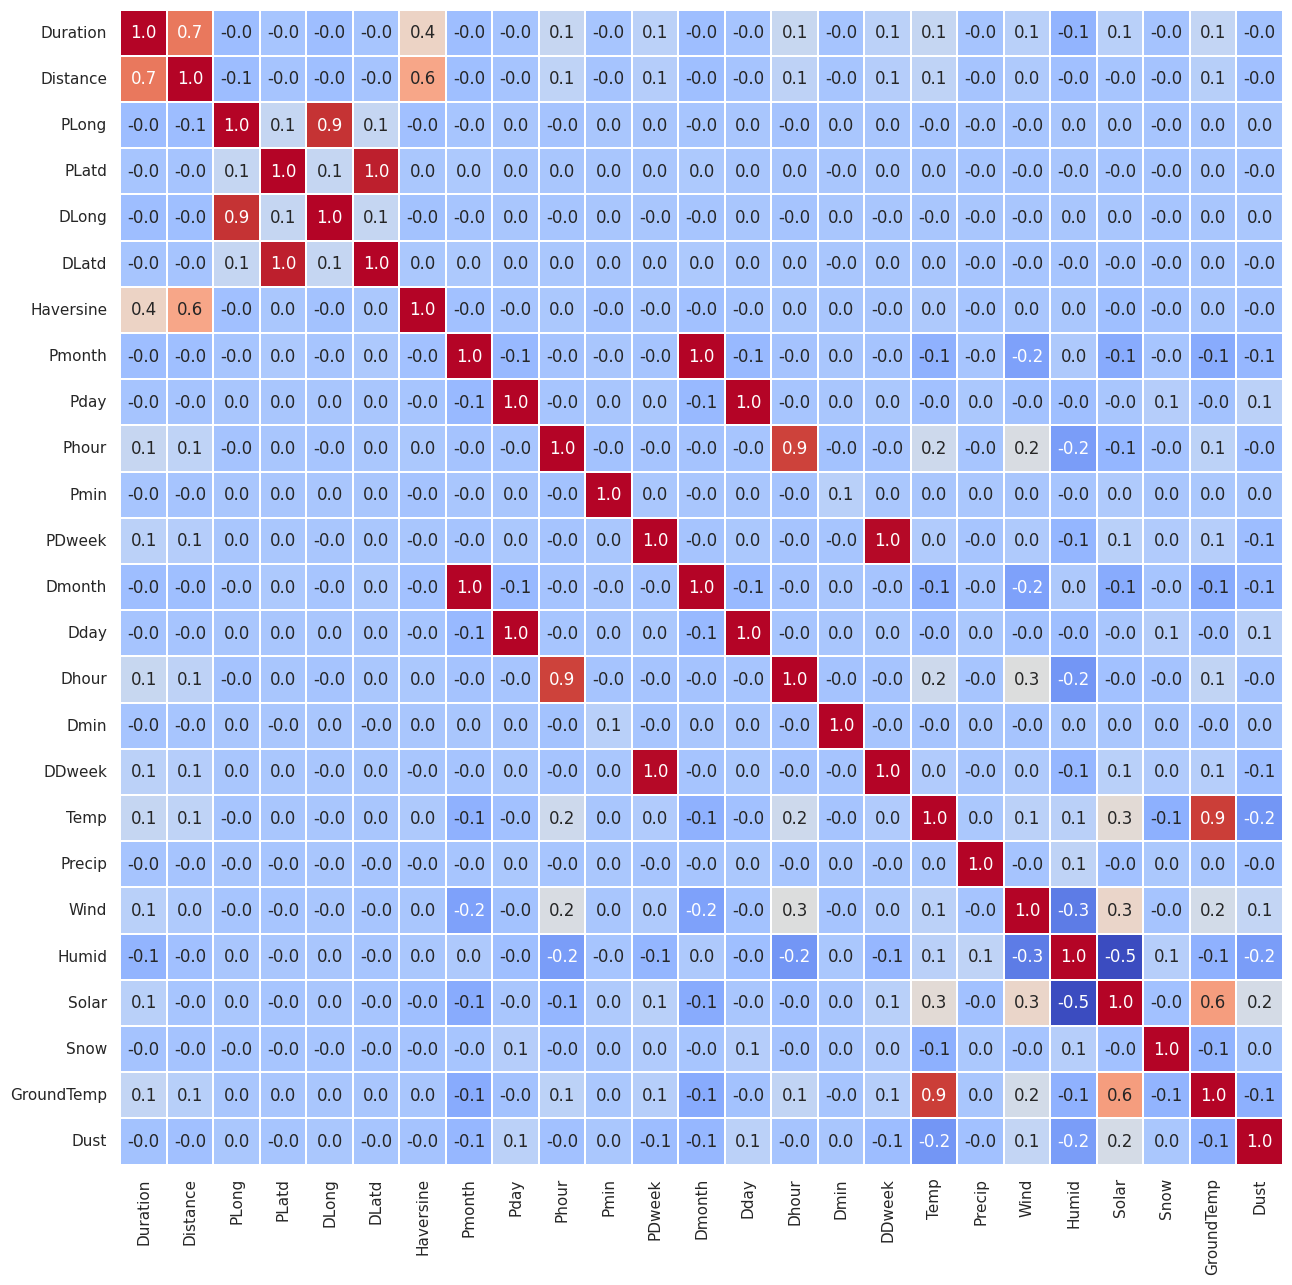

In [ ]:
correlation_matrix = dataframe.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, fmt='.1f', annot=True, cbar=False, linewidth=0.2, cmap='coolwarm');

In [ ]:
absolute_correlations = correlation_matrix["Temp"].abs().drop("Temp")

# Sort the correlations in descending order
sorted_correlations = absolute_correlations.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)

GroundTemp    0.902920
Solar         0.283598
Dust          0.227242
Phour         0.168592
Dhour         0.167845
Duration      0.128204
Snow          0.116919
Pmonth        0.107571
Dmonth        0.107473
Distance      0.097193
Wind          0.083037
Humid         0.079406
PDweek        0.035677
DDweek        0.035665
Pday          0.026654
Dday          0.026620
Haversine     0.026427
Precip        0.011275
Dmin          0.009531
PLong         0.004360
DLatd         0.003744
PLatd         0.002749
DLong         0.001338
Pmin          0.000139
Name: Temp, dtype: float64


In [ ]:
upper_triangular = np.triu(correlation_matrix, k=1)

# Define a threshold for correlation magnitude
threshold = 0.2 # You can adjust this threshold as needed

# Get the indices of correlations above the threshold
significant_indices = np.where(np.abs(upper_triangular) >= threshold)

# Get the column names
column_names = dataframe.columns

# Print the significant correlations and their corresponding column names
for row, col in zip(*significant_indices):
    if row != col:
        column1_name = column_names[row]
        column2_name = column_names[col]
        correlation = correlation_matrix.iloc[row, col]
        sign = "Positive" if correlation >= 0 else "Negative"
        print(f"{sign} correlation between columns '{column1_name}' and '{column2_name}': {abs(correlation):.2f}")


Positive correlation between columns 'Duration' and 'Distance': 0.74
Positive correlation between columns 'Duration' and 'Haversine': 0.35
Positive correlation between columns 'Distance' and 'Haversine': 0.58
Positive correlation between columns 'PLong' and 'DLong': 0.93
Positive correlation between columns 'PLatd' and 'DLatd': 0.96
Positive correlation between columns 'Pmonth' and 'Dmonth': 1.00
Positive correlation between columns 'Pday' and 'Dday': 1.00
Positive correlation between columns 'Phour' and 'Dhour': 0.89
Positive correlation between columns 'Phour' and 'Wind': 0.23
Positive correlation between columns 'PDweek' and 'DDweek': 0.99
Positive correlation between columns 'Dhour' and 'Wind': 0.25
Negative correlation between columns 'Dhour' and 'Humid': 0.23
Positive correlation between columns 'Temp' and 'Solar': 0.28
Positive correlation between columns 'Temp' and 'GroundTemp': 0.90
Negative correlation between columns 'Temp' and 'Dust': 0.23
Negative correlation between colum

# Making the Model

In [ ]:
df = dataframe.drop(['Distance', 'Wind', 'Humid', 'PDweek', 'DDweek', 'Pday', 'Dday', 'Haversine', 'Precip', 'Dmin', 'PLong', 'DLatd', 'PLatd', 'DLong', 'Pmin'], axis=1)

seoul_data = df.sample(n=3000000, replace=True,random_state=20)
seoul_data.reset_index(drop=True,inplace=True)
seoul_data

,Duration,Pmonth,Phour,Dmonth,Dhour,Temp,Solar,Snow,GroundTemp,Dust
0,53,12,12,12,13,6.4,1.60,0.0,9.3,59.0
1,14,6,21,6,21,23.8,0.00,0.0,22.0,33.0
2,16,9,18,9,19,27.9,0.20,0.0,29.5,22.0
3,11,7,5,7,5,24.5,0.00,0.0,23.7,21.0
4,7,5,22,5,23,12.3,0.00,0.0,14.7,21.0
...,...,...,...,...,...,...,...,...,...,...
2999995,47,7,22,7,23,22.6,0.00,0.0,22.7,14.0
2999996,85,9,14,9,15,21.1,2.48,0.0,36.7,26.0
2999997,84,3,16,3,17,11.6,2.11,0.0,18.2,27.0
2999998,14,8,2,8,2,29.0,0.00,0.0,27.9,11.0


In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn import preprocessing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(seoul_data, seoul_data["Temp"], random_state=42, test_size=0.25)

size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor